In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import pandas as pd
import numpy as np
df=pd.read_excel('C:\\Users\\srrml\\Desktop\\ML assignments\\Lab05-srishti7103\\Lab05-srishti7103\\Telecom_churn_rate.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


Task 1: EDA & cleaning

In [46]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
1922,8201-AAXCB,Male,0,Yes,Yes,25,Yes,Yes,DSL,No,...,Yes,No,Month-to-month,No,Electronic check,60.35,1404.65,3,0,No
4656,9800-ONTFE,Female,0,Yes,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),75.80,1615.1,0,0,No
672,3276-HDUEG,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,75.05,75.05,0,0,Yes
1706,0727-BNRLG,Male,0,No,No,69,Yes,Yes,Fiber optic,No,...,Yes,No,Two year,Yes,Credit card (automatic),97.65,6743.55,0,0,No
3492,0975-VOOVL,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,Month-to-month,No,Mailed check,29.20,98.5,0,0,No


In [47]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [48]:
df.shape

(7043, 23)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
print(df['TotalCharges'].dtype)

object


In [51]:
df['TotalCharges'].unique()

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5],
      shape=(6531,), dtype=object)

In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [53]:
missing_data = df.isnull().sum()
print(missing_data)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64


In [54]:
missing_percent =(missing_data / len(df)) * 100
print(missing_percent)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
numAdminTickets     0.000000
numTechTickets      0.000000
Churn               0.000000
dtype: float64


In [55]:
missing_summary = pd.DataFrame({
    "missing_values": missing_data,
    "percent(%)": missing_percent.round(2)
})

In [56]:
print(missing_summary[missing_summary["missing_values"] > 0])

              missing_values  percent(%)
TotalCharges              11        0.16


In [57]:
df = df.dropna(subset=['TotalCharges'])

In [58]:
missing_data = df.isnull().sum()
missing_summary_after = pd.DataFrame({
    "missing_values": missing_data,
    "percent(%)": (missing_data / len(df)) * 100
})

In [59]:
print(missing_data)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


DATA VISUALISATION

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\srrml\AppData\Local\Temp\ipykernel_4804\2731943729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set3")


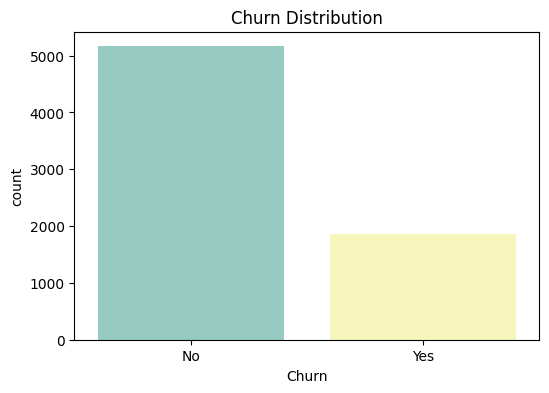

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="Set3")
plt.title("Churn Distribution")
plt.show()

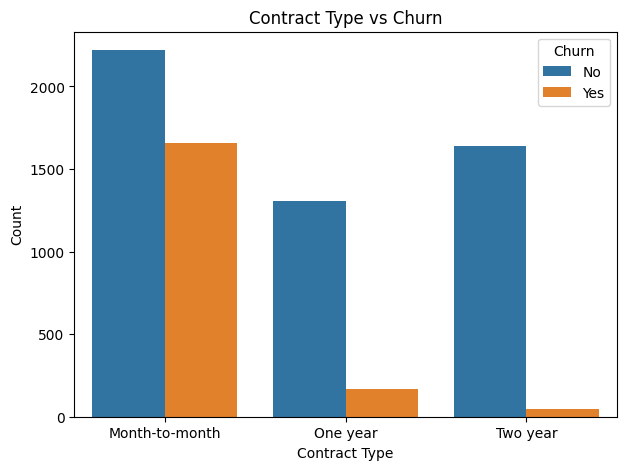

In [62]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

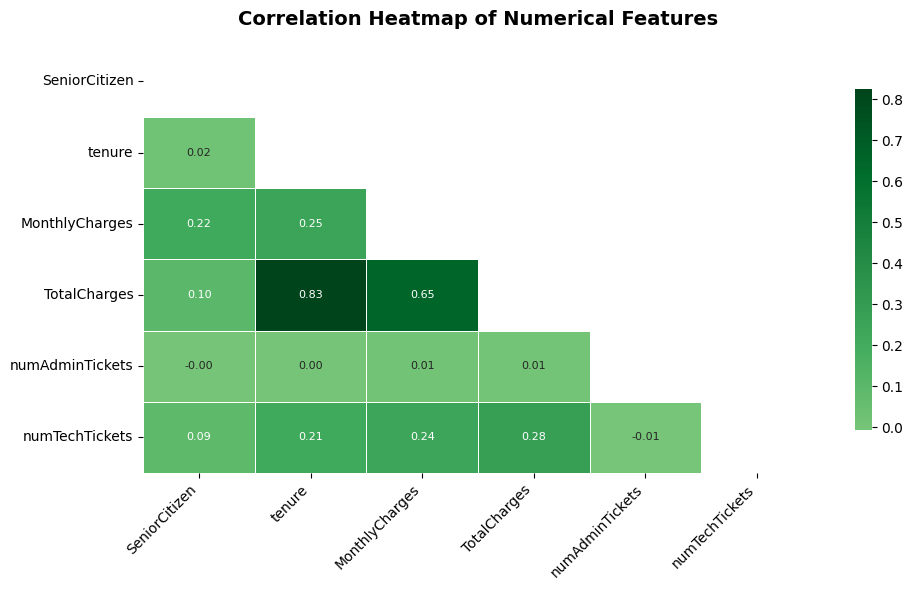

In [63]:
plt.figure(figsize=(10,6))
df_corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap="Greens", 
            center=0,
            cbar_kws={"shrink": 0.8},
            linewidths=0.5,
            annot_kws={"size":8})

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

###  EDA Summary

1. Churn distribution- dataset is imbalanced,with most of the customers not churning(less customers churning),roughly 3times more customers stayed then left.
2. Contract Type vs Churn- customers with month to month contract have a much higher churn rate those with one-year or two-year contracts.
3. Correlation heatmap- it shows there is a strong positve correlation between tenure and total charges. Monthly charges also correlates moderately with totalcharges and other features like seniorcitizen,numadmintickets and numtechticekts show little to no correlation with each other.


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Churn'])  
X = X.select_dtypes(include=['float64', 'int64'])  
X_con = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_con.columns
vif["VIF"] = [variance_inflation_factor(X_con.values, i) for i in range(X_con.shape[1])]

Task2: feauture engineering

In [65]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])

In [66]:
df['AvgMonthlyTickets'] = np.where(df['tenure'] > 0,
                                   (df['numAdminTickets'] + df['numTechTickets']) / df['tenure'],
                                   0).round(2)

In [67]:
print(df[['tenure', 'TenureGroup', 'AvgMonthlyTickets']].head())

   tenure TenureGroup  AvgMonthlyTickets
0       1      0-1 yr               0.00
1      34     2-4 yrs               0.00
2       2      0-1 yr               0.00
3      45     2-4 yrs               0.07
4       2      0-1 yr               0.00


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [70]:
X = df.drop(columns=['Churn', 'customerID', 'TotalCharges'])
y = df['Churn'].map({'Yes': 1, 'No': 0}) 

In [71]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", numeric_features)
print("\nCategorical:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000,class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'AvgMonthlyTickets']

Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

print("\nIn Depth Classification Analysis:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Logistic Regression Performance:
Accuracy : 0.8188
Precision: 0.6121
Recall   : 0.8690

In Depth Classification Analysis:
              precision    recall  f1-score   support

    No Churn       0.94      0.80      0.87      1033
       Churn       0.61      0.87      0.72       374

    accuracy                           0.82      1407
   macro avg       0.78      0.83      0.79      1407
weighted avg       0.86      0.82      0.83      1407



### In this task, I chose Logistic regression as it is the basic model for classification. 

i will select Random forest as in another model, as it is an ensembling learning model, it generally gives better accuracy than the logistic regression or any other linear models. As it captures non-linear relationship, while reducing overfitting through ensembling. 

Third model I chose was Gradient boosting, as it is more advanced ensembling technique, that sequentially improve model's performance and also gets higher predictive accuracy.

TASK4: MODEL SELECTION AND HYPERTUNING

In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name}: F1-weighted = {f1:.3f}")

Logistic Regression: F1-weighted = 0.848
Random Forest: F1-weighted = 0.840
Gradient Boosting: F1-weighted = 0.848


In [74]:
param_grid_gb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.1, 0.5],
    "classifier__max_depth": [5, 7, 9]
}

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))

Best Hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Best Cross-Validation F1-weighted: 0.8581065142845435
Test F1-weighted: 0.8473234583939339

Classification Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.88      0.92      0.90      1033
       Churn       0.75      0.66      0.70       374

    accuracy                           0.85      1407
   macro avg       0.82      0.79      0.80      1407
weighted avg       0.85      0.85      0.85      1407



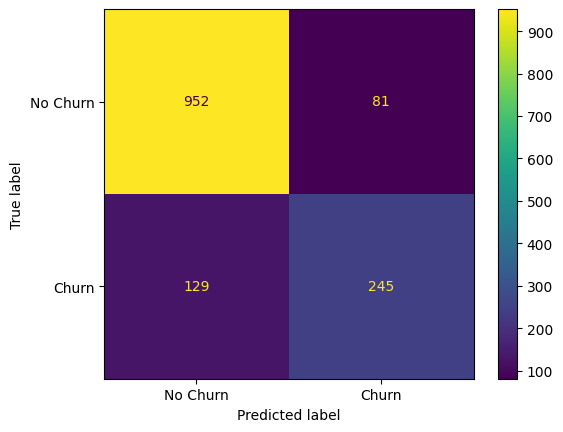

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(grid_search_gb, X_test, y_test, display_labels=["No Churn", "Churn"])
plt.show()

TASK5: Handling class imbalance

In [76]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

smote_pipeline.fit(X_train, y_train)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_res, y_res = smote_pipeline.named_steps["smote"].fit_resample(X_train_preprocessed, y_train)
print("\n Rows added by SMOTE (for oversampling)")
print("Before SMOTE:", X_train.shape[0], "rows")
print("After SMOTE:", X_res.shape[0], "rows")
print("Rows added:", X_res.shape[0] - X_train.shape[0])

print("\n === Without SMOTE ===")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

y_pred_smote = smote_pipeline.predict(X_test)

print("\n=== With SMOTE ===")
print(classification_report(y_test, y_pred_smote, target_names=["No Churn", "Churn"]))

print("F1-weighted with SMOTE:",
      f1_score(y_test, y_pred_smote, average="weighted"))




 Rows added by SMOTE (for oversampling)
Before SMOTE: 5625 rows
After SMOTE: 8260 rows
Rows added: 2635

 === Without SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.88      0.92      0.90      1033
       Churn       0.75      0.66      0.70       374

    accuracy                           0.85      1407
   macro avg       0.82      0.79      0.80      1407
weighted avg       0.85      0.85      0.85      1407

Test F1-weighted: 0.8473234583939339

=== With SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.92      0.85      0.88      1033
       Churn       0.66      0.79      0.72       374

    accuracy                           0.84      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.84      0.84      1407

F1-weighted with SMOTE: 0.8401131741194897


From the above classification report, we can say that by using SMOTE, the overall F1-weighted is not much improved, but it made the model more fair and balanced by improving the minority class’s recall. In churn prediciton system, catching more churn cases (even if it is a false alarm) can be more valuable because missing churn can be more costlier than wrongly catching the non-churn ones. 

TASK6: Final evaluation and interpretation

In [77]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [78]:
y_pred_final = smote_pipeline.predict(X_test) 
y_proba_final = smote_pipeline.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

print("Final Model Performance on Test Set:")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")

Final Model Performance on Test Set:
Precision : 0.6600
Recall    : 0.7888
F1-Score  : 0.7186
ROC AUC   : 0.9149



Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.85      0.88      1033
       Churn       0.66      0.79      0.72       374

    accuracy                           0.84      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.84      0.84      1407

F1 weighted:  0.8401131741194897


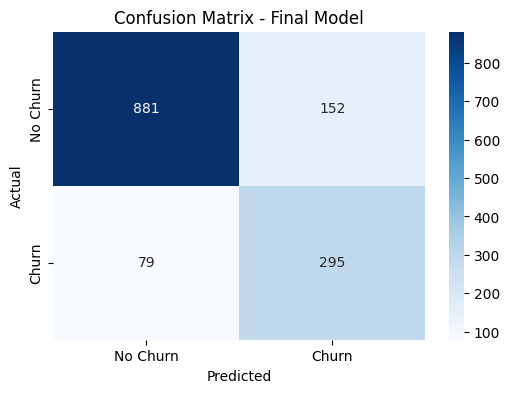

In [79]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=["No Churn", "Churn"]))
print("F1 weighted: ", f1_score(y_test, y_pred_smote, average="weighted"))

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Model")
plt.show()

### Analyze the confusion matrix. In the context of customer churn, what is the business cost of a False Positive versus a False Negative? Which one is worse?
False Positive (152): Predicted churn, but customer stays.
False Negative (79): Predicted no churn, but customer leaves.

Business Cost

1. False Positive
Wastes time and money on retention offers.
May annoy loyal customers.
2. False Negative
Loses real customers.
Misses chance to retain them.
Hurts revenue and brand trust.

Which Is Worse?
False Negatives are more harmful—because losing a customer is harder to fix than offering help to one who didn’t need it.


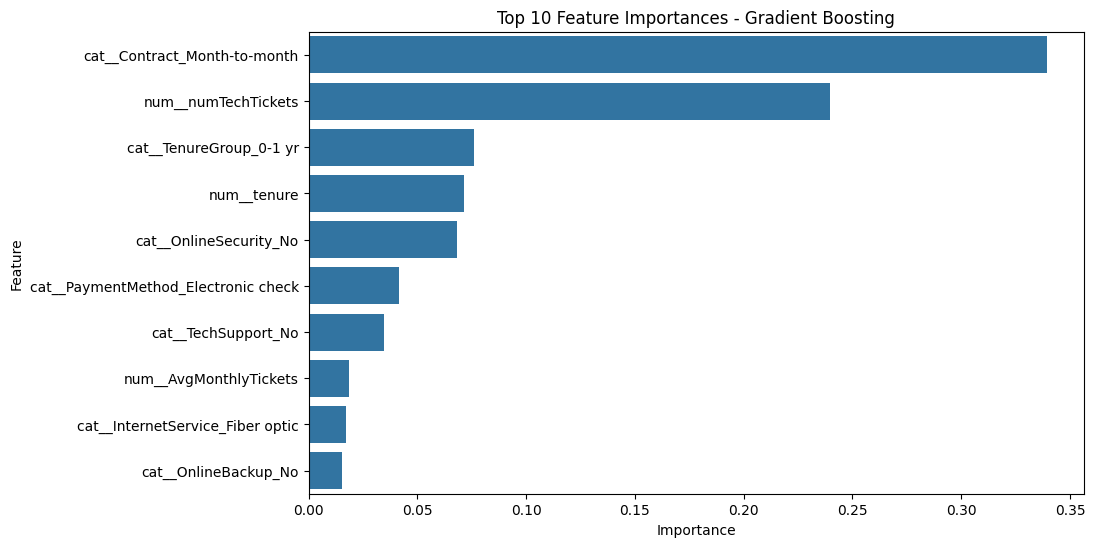

In [81]:
preprocessor = smote_pipeline.named_steps['preprocessor']
gb_model = smote_pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
})

top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [82]:
print("Top 10 features driving churn:")
for i, feature in enumerate(top_features['feature'], 1):
    print(f"{i}. {feature}")

Top 10 features driving churn:
1. cat__Contract_Month-to-month
2. num__numTechTickets
3. cat__TenureGroup_0-1 yr
4. num__tenure
5. cat__OnlineSecurity_No
6. cat__PaymentMethod_Electronic check
7. cat__TechSupport_No
8. num__AvgMonthlyTickets
9. cat__InternetService_Fiber optic
10. cat__OnlineBackup_No


### Discuss what these features tell you about the main drivers of customer churn.
1. Month-to-month contracts → Biggest churn risk. Customers without long-term commitment are more likely to leave.
2. High number of tech support tickets → Signals frustration or unresolved issues—likely to push customers away.
3. Short tenure (0–1 year) → New customers are more likely to churn early if they don’t see value quickly.
4. No online security or backup → May reflect dissatisfaction with service offerings or lack of trust.
5. Electronic check payments → Often linked to lower satisfaction or less engaged users.
6. Fiber optic internet → Surprisingly, this may indicate higher expectations not being met.
7. No tech support → Lack of help options can lead to poor customer experience.

Churn is driven by contract type, customer service issues, and lack of value-added services. Addressing these areas could reduce churn significantly.